In [8]:
import lumos.plot
print(dir(lumos.plot))

['BRDF_1D', 'BRDF_2D', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'brightness_summary_observer_frame', 'brightness_summary_satellite_frame', 'colorbar', 'contour_observer_frame', 'contour_satellite_frame', 'create_video', 'cv2', 'lumos', 'mark_angles_above_horizon_satellite_frame', 'mark_sun_altitude_observer_frame', 'mark_sun_azimuth_observer_frame', 'matplotlib', 'np', 'os', 'plot_compass', 'plt']


In [9]:
import numpy as np
import lumos.brdf.tools
import matplotlib.pyplot as plt
import lumos.plot
from lumos.brdf.library import ABG

A, B, g = lumos.brdf.tools.fit(
    "aluminum_brdf.csv",
    ABG,
    bounds = (0, 1e4),
    p0 = (1, 1, 1))

print(f"{A = :0.3e}")
print(f"{B = :0.3e}")
print(f"{g = :0.3f}")

A = 3.362e-03
B = 4.309e-06
g = 2.068


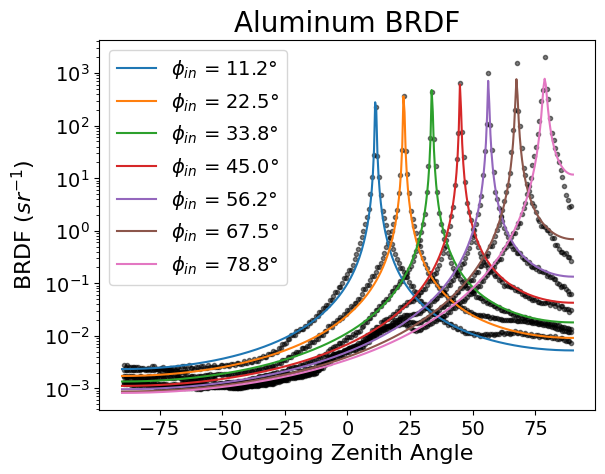

In [11]:
fig, ax = plt.subplots()

phi_i, theta_i, phi_o, theta_o, brdf = lumos.brdf.tools.read_brdf("aluminum_brdf.csv")
ax.semilogy(phi_o, brdf, 'k.', alpha = 0.5, zorder = 2)
lumos.plot.BRDF_1D(ax, ABG(A, B, g), incident_angles = np.unique(phi_i))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Outgoing Zenith Angle", fontsize = 16)
plt.ylabel(r"BRDF $(sr^{-1})$", fontsize = 16)
plt.title("Aluminum BRDF", fontsize = 20)
plt.legend(fontsize = 14)
plt.show()

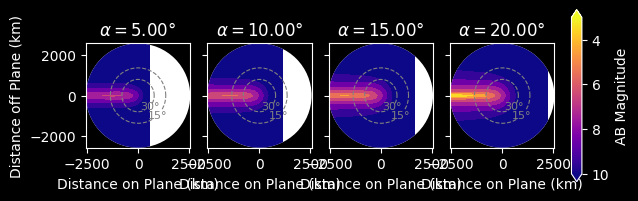

In [12]:
import simple_sat
import lumos.plot
import lumos.brdf.library
import numpy as np

sat_height = 550 * 1000 # Geodetic height of satellite (meters)

angles_past_terminator = [5, 10, 15, 20]

lumos.plot.brightness_summary_satellite_frame(
    simple_sat.SURFACES,
    angles_past_terminator,
    sat_height,
    levels = (3, 10)
    )

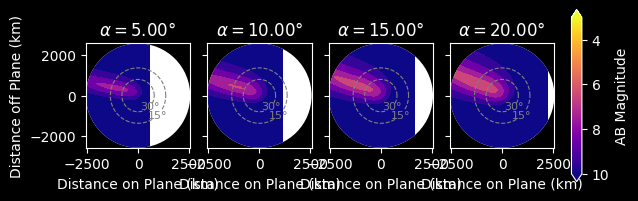

In [14]:
# Angle of rotation of the surface
angle = np.deg2rad(30)

# Rotate the surface in the x direction
simple_sat.SURFACES[0].normal = np.array([np.sin(angle), 0, -np.cos(angle)])

lumos.plot.brightness_summary_satellite_frame(
    simple_sat.SURFACES,
    angles_past_terminator,
    sat_height,
    levels = (3, 10)
    )

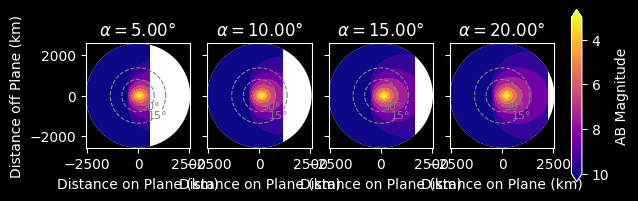

In [16]:
# Angle of rotation of the surface
angle = np.deg2rad(45)

# Rotate the surface in the y direction
simple_sat.SURFACES[0].normal = np.array([0, np.sin(angle), -np.cos(angle)])

lumos.plot.brightness_summary_satellite_frame(
    simple_sat.SURFACES,
    angles_past_terminator,
    sat_height,
    levels = (3, 10)
    )

In [17]:
import lumos.geometry
observers = lumos.geometry.GroundObservers(
                sat_height,
                np.deg2rad(20),
                density = 200
            )

observers.calculate_intensity(simple_sat.SURFACES)

idx = np.argmax( observers.intensities )
dist_off_plane = observers.dists_off_plane.flatten()[idx]
dist_on_plane = observers.dists_on_plane.flatten()[idx]

print( f"Peak Intensity: {observers.intensities.max() * 1e9:0.0f} nW / m^2")
print( f"Distance off Plane: {dist_off_plane / 1000 :0.0f} km")
print( f"Distance on Plane: {dist_on_plane / 1000 :0.0f} km")

Peak Intensity: 130 nW / m^2
Distance off Plane: -13 km
Distance on Plane: 207 km


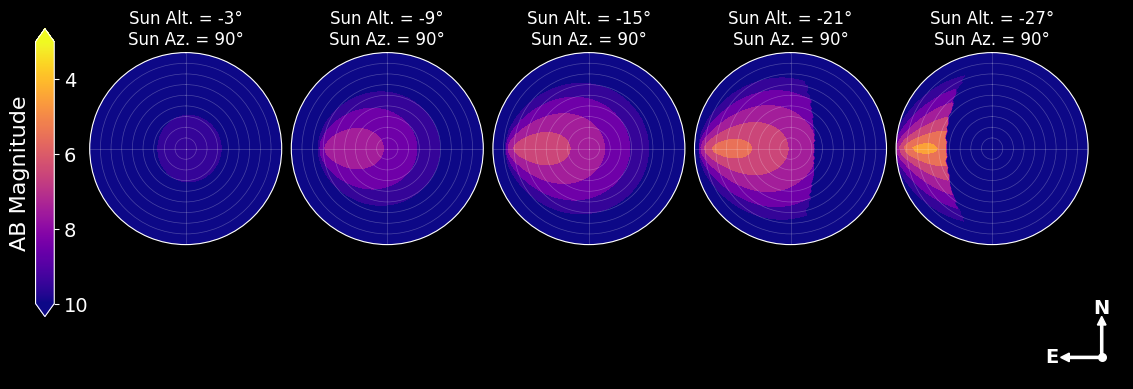

In [30]:
from lumos.geometry import Surface
from lumos.brdf.library import ABG
import numpy as np

area = 5.0     # meters^2
normal = np.array([0, 0, -1])
brdf = ABG(A = 3.362e-03, B = 4.309e-06, g = 2.068)

aluminum_plate = Surface(area, normal, brdf)

SURFACES = [aluminum_plate]

import lumos.plot

lumos.plot.brightness_summary_observer_frame(SURFACES,
    sat_height = 550 * 1000,
    sun_altitudes = [-3, -9, -15, -21, -27],
    sun_azimuths = [90, 90, 90, 90, 90],
    levels = (3, 10)
)

In [32]:
import lumos.calculator
import numpy as np

from lumos.geometry import Surface
from lumos.brdf.library import ABG
import numpy as np

area = 5.0     # meters^2
normal = np.array([0, 0, -1])
brdf = ABG(A = 3.362e-03, B = 4.309e-06, g = 2.068)

aluminum_plate = Surface(area, normal, brdf)

SURFACES = [aluminum_plate]

sat_height = 550 * 1000 # 550 kilometer geodetic height


sat_altitudes, sat_azimuths = \
    np.meshgrid(
    np.linspace(0, 90, 90), 
    np.linspace(0, 360, 180))

intensities = lumos.calculator.get_intensity_observer_frame(SURFACES, sat_height, sat_altitudes, sat_azimuths,
        sun_altitude = -27, sun_azimuth = 90,
        include_earthshine = False
    )
    
# Convert intensity to AB Magnitude
ab_magnitudes = lumos.conversions.intensity_to_ab_mag(intensities)

peak_ab_mag = ab_magnitudes.min()
idx = np.argmin(ab_magnitudes)
peak_alt = sat_altitudes.flatten()[idx]
peak_az = sat_azimuths.flatten()[idx]

print( f"Brightest: {peak_ab_mag:0.1f} AB Magnitude")
print( f"Altitude: {peak_alt:0.0f}°")
print( f"Azimuth: {peak_az:0.0f}°")

Brightest: 4.6 AB Magnitude
Altitude: 23°
Azimuth: 91°


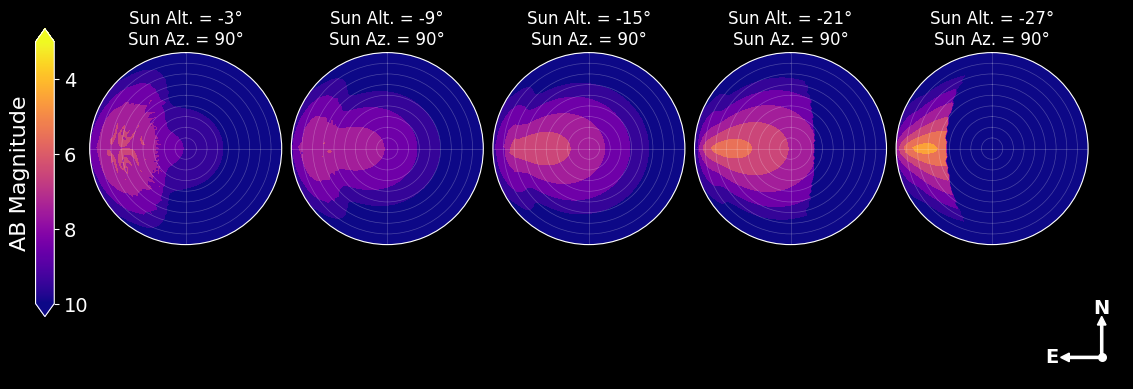

In [1]:
from lumos.geometry import Surface
from lumos.brdf.library import ABG
import numpy as np

area = 5.0     # meters^2
normal = np.array([0, 0, -1])
brdf = ABG(A = 3.362e-03, B = 4.309e-06, g = 2.068)

aluminum_plate = Surface(area, normal, brdf)

SURFACES = [aluminum_plate]

import lumos.plot

lumos.plot.brightness_summary_observer_frame(SURFACES,
    sat_height = 550 * 1000,
    sun_altitudes = [-3, -9, -15, -21, -27],
    sun_azimuths = [90, 90, 90, 90, 90],
    include_earthshine=True,
    earth_brdf = lumos.brdf.library.PHONG(0.53, 0.28, 7.31),
    levels = (3, 10)
)